In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

In [2]:
data = load_iris()

In [23]:
feature_names = data['feature_names']

In [25]:
class_names = data['target_names']

In [3]:
X = data['data']

In [4]:
y = data['target']

In [55]:
class_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
X.shape

(150, 4)

In [6]:
y.shape

(150,)

In [7]:
import pandas as pd

In [8]:
pd.DataFrame(X).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=46, stratify=y)

In [11]:
X_train.shape

(105, 4)

In [12]:
y_test.shape

(45,)

In [72]:
class_weight = {0 : 1,
                1 : 30,
                2 : 1}

In [73]:
model = DecisionTreeClassifier(max_depth=2, class_weight=class_weight)

In [74]:
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight={0: 1, 1: 30, 2: 1},
                       criterion='gini', max_depth=2, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best')

In [75]:
y_pred = model.predict(X_test)

In [76]:
from sklearn.metrics import accuracy_score

In [77]:
accuracy_score(y_test, y_pred)

0.8888888888888888

In [78]:
from sklearn.tree import plot_tree
from matplotlib import pyplot as plt

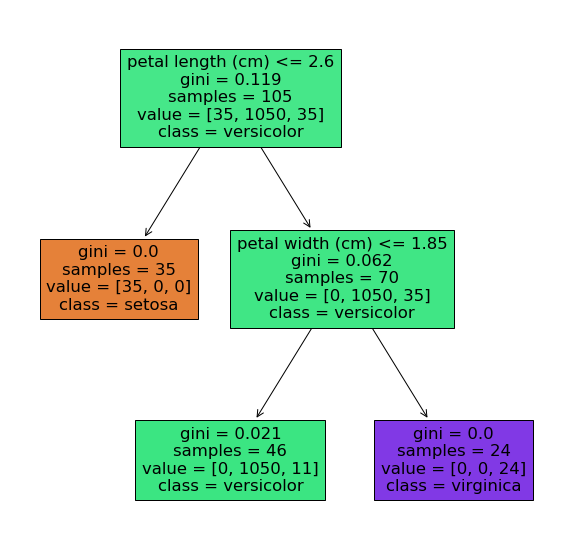

In [79]:
plt.figure(figsize=(10,10))
_ = plot_tree(model,
              feature_names=feature_names,
              class_names=class_names,
              filled=True)

In [47]:
y_train_pred = model.predict(X_train)

In [48]:
accuracy_score(y_train, y_train_pred)

0.9809523809523809

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
model = RandomForestClassifier()

In [51]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
y_pred = model.predict(X_test)

In [53]:
accuracy_score(y_test, y_pred)

0.9111111111111111

In [80]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.75      1.00      0.86        15
           2       1.00      0.67      0.80        15

    accuracy                           0.89        45
   macro avg       0.92      0.89      0.89        45
weighted avg       0.92      0.89      0.89        45



In [84]:
y_test.shape

(45,)